In [23]:
### step 0: Kaggle üzerinden seçilen https://www.kaggle.com/datasets/ealaxi/paysim1 dataset kullanıldı.

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
### step 1: Gerekli kütühaneler dahil edildi. 

In [21]:
### 30. kod bloğuna kadar Keşifsel Veri Analizi (EDA - Exploratory Data Analysis) kısımlarını göreceğiz.

In [22]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [23]:
### step 2: Veriyi pandas aracılığı ile dataframe olarak çıktısı alındı ve ilk 15 satır .head() methodu kullanılarak yazdırıldı.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [25]:
### step 3: .info() methodu ile dtypeler incelendi.

In [26]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [27]:
### step 4: .tail() methodu ile son 5 satıra göz atıldı.

In [31]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [32]:
### step 5: .desribe() methodu ile özet istatistikleri inceledik.

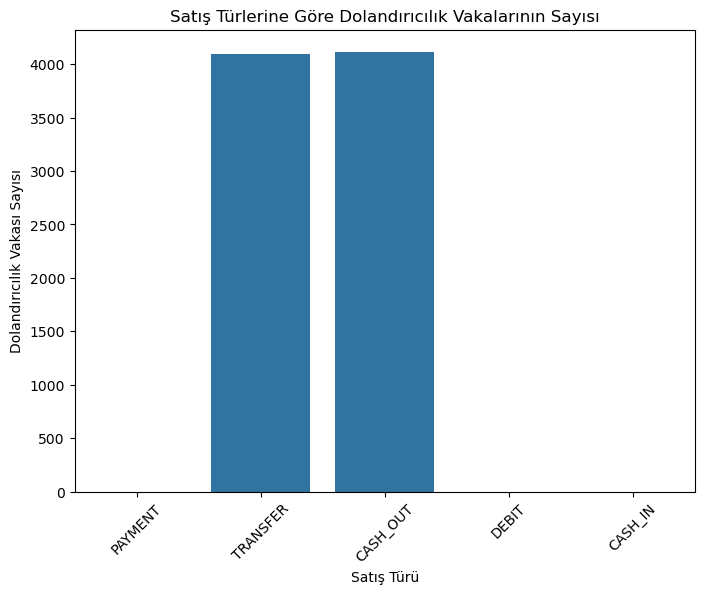

In [33]:
unique_types = df['type'].unique()


fraud_counts = df[df['isFraud'] == 1]['type'].value_counts()


fraud_counts = fraud_counts.reindex(unique_types, fill_value=0)

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Satış Türlerine Göre Dolandırıcılık Vakalarının Sayısı')
plt.xlabel('Satış Türü')
plt.ylabel('Dolandırıcılık Vakası Sayısı')
plt.xticks(rotation=45) 
plt.show()

In [34]:
### step 6: Yukarıdaki kod bloğunda elde ettiğimiz veriyi matplotlib.pyplot ve seaborn kütühaneleri yardımı ile grafiğe taşıdım. Grafikte hangi type ne kadar isFruad almış yani dolandırılmış bunu görmekteyiz.

In [35]:
### Veri Ön İşleme bölümü

In [36]:
df.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [37]:
### step 7: Yukarıdaki kod bloğunda .drop(() methodunu kullanarak gerekli bu projede işe yaramaycak olan gereksiz veriler temizlendi.

In [38]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [39]:
### step 8: .head() methodu ile ilk 5 satırı inceledim.

In [40]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [41]:
### step 9: LabelEncoder kullanarak Dtype object sütününü sayısal değere çevirdim.

In [42]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [43]:
### step 10: .head() kullanarak verinin son durumunu inceledim.

In [43]:
y = df['isFraud']
X = df.drop(['isFraud'], axis=1)

In [ ]:
### step 11: X ve y değerlerini belirledik. y hedef olan isFruad kısmı iken kalan kısımları X olarak belirledim.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
### step 12: Verileri eğitim ve test verileri olarak ayırdım. 

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6
0,-1.269621,0.250094,-0.281447,-0.172269,-0.190799,-0.300451,-0.001598
1,0.952490,-0.279431,-0.278155,-0.285989,-0.324181,-0.333782,-0.001598
2,-1.269621,-0.045699,-0.251754,-0.203827,-0.264833,-0.320406,-0.001598
3,1.693193,2.280522,-0.288675,-0.292395,0.618756,0.961809,-0.001598
4,-1.269621,-0.168854,0.723236,0.733907,-0.201589,-0.241688,-0.001598
...,...,...,...,...,...,...,...
1272519,0.952490,-0.297264,-0.285348,-0.289423,-0.324181,-0.333782,-0.001598
1272520,0.952490,-0.297992,-0.287053,-0.290958,-0.324181,-0.333782,-0.001598
1272521,-0.528918,0.114282,-0.288499,-0.292395,-0.317162,-0.259507,-0.001598
1272522,-0.528918,0.033661,-0.288675,-0.292395,-0.150245,-0.118315,-0.001598


In [ ]:
### step 13: Yukarıda veri standardizasyonu yaparak farklı ölçeklerdeki özelliklerin algoritmanın performansını olumsuz etkilemesini engelledim.

In [ ]:
### Model seçimi ve eğitimi

In [46]:
model = LogisticRegression(max_iter=1000) 
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
### step 14: Bu adımda gözetimli algortima türleri arasından bu veri setine en uygun olarak gördüğüm lojistik regrasyonu seçtim. .fit() methodu ile makinemizi eğitmeye başlıyoruz.

In [47]:
y_pred = model.predict(X_test_scaled)

In [ ]:
### step 15: Bu adımda test için ayırdığım verileri modele tahmin ettirip oluşan değerleri
### gerçek verilerle karşılaştırıp modelin gerçek skorunu bulmak için kullanıcağım.

In [48]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Doğruluk Oranı:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)
print("Sınıflandırma Raporu:\n", class_report)

Doğruluk Oranı: 0.9991552222197774
Karışıklık Matrisi:
 [[1270808      96]
 [    979     641]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.87      0.40      0.54      1620

    accuracy                           1.00   1272524
   macro avg       0.93      0.70      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
### step 16: Sonuçları değerlendırıp yazdırdığımız adım. F1-score, recall değerlerini inceledim.

In [49]:
y_train_pred = model.predict(X_train_scaled)

accuracy_score(y_train, y_train_pred)

0.9991632770776818

In [ ]:
### step 17: 48. kod bloğunda incelemiş olduğum test ve 49. kod bloğunda incelemiş olduğum train sonuçlarına bakarak herhangi bir overfitting ve unnderfitting olmadığına karar verdim ve herhangi bir hiperparametre uygulamaya gerek olmadığı kanısına vardım.